In [2]:
import pandas as pd
df = pd.read_csv("/Users/narayansanthanam/Downloads/Disease Prediction/parkinsons - parkinsons.csv")

In [11]:
df

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,phon_R01_S50_2,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,...,0.07008,0.02764,19.517,0,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,phon_R01_S50_3,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,...,0.04812,0.01810,19.147,0,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,phon_R01_S50_4,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,...,0.03804,0.10715,17.883,0,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,phon_R01_S50_5,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,...,0.03794,0.07223,19.020,0,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306


In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

x=df.drop(columns=['status','name'])
y=df['status']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

scalar = MinMaxScaler()
x_train_scaled = scalar.fit_transform(x_train)
x_test_scaled = scalar.transform(x_test)

model = LogisticRegression()
model.fit(x_train_scaled,y_train)

y_pred = model.predict(x_test_scaled)
print("Accuracy ",accuracy_score(y_test,y_pred))
print("Classification Report",classification_report(y_test,y_pred))



Accuracy  0.8974358974358975
Classification Report               precision    recall  f1-score   support

           0       1.00      0.43      0.60         7
           1       0.89      1.00      0.94        32

    accuracy                           0.90        39
   macro avg       0.94      0.71      0.77        39
weighted avg       0.91      0.90      0.88        39



In [13]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler()
x_rus,y_rus = rus.fit_resample(x,y)
scalar = MinMaxScaler()
x_train_scaled = scalar.fit_transform(x_rus)
x_test_scaled = scalar.transform(x_rus)
x_rus_train,x_rus_test,y_rus_train,y_rus_test = train_test_split(x_rus,y_rus,test_size=0.2,random_state=42)

model.fit(x_rus_train,y_rus_train)
y_rus_pred = model.predict(x_rus_test)
print(accuracy_score(y_rus_test,y_rus_pred))
print(classification_report(y_rus_test,y_rus_pred))

0.8
              precision    recall  f1-score   support

           0       0.77      0.91      0.83        11
           1       0.86      0.67      0.75         9

    accuracy                           0.80        20
   macro avg       0.81      0.79      0.79        20
weighted avg       0.81      0.80      0.80        20



/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [23]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
modelrand = RandomForestClassifier()
modelrand.fit(x_rus_train,y_rus_train)
y_pred =model.predict(x_rus_test)
print(classification_report(y_rus_test,y_pred))
print(accuracy_score(y_rus_test,y_pred))
# Define hyperparameter grid for tuning


              precision    recall  f1-score   support

           0       0.85      1.00      0.92        11
           1       1.00      0.78      0.88         9

    accuracy                           0.90        20
   macro avg       0.92      0.89      0.90        20
weighted avg       0.92      0.90      0.90        20

0.9


In [22]:
param_grid = {
   'criterion': ['gini', 'entropy','log_loss'],
   'max_depth': [5, 10, 15,30,50, None],
   'min_samples_split': [2, 5, 10,20],
   'min_samples_leaf': [1, 2, 4,6]
}
# 1. **Grid Search CV** (Exhaustive Search for Best Hyperparameters)
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(x_rus_train, y_rus_train)
# Get the best parameters
print("Best parameters from Grid Search CV:", grid_search.best_params_)
print("Best accuracy from Grid Search CV:", grid_search.best_score_)
# Train with best parameters
best_model_grid = grid_search.best_estimator_
y_pred_grid = best_model_grid.predict(x_rus_test)
# Performance Metrics
print("\nGrid Search CV Classification Report:\n", classification_report(y_rus_test, y_pred_grid))

Best parameters from Grid Search CV: {'criterion': 'log_loss', 'max_depth': 50, 'min_samples_leaf': 4, 'min_samples_split': 5}
Best accuracy from Grid Search CV: 0.8425

Grid Search CV Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.73      0.76        11
           1       0.70      0.78      0.74         9

    accuracy                           0.75        20
   macro avg       0.75      0.75      0.75        20
weighted avg       0.76      0.75      0.75        20



In [15]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
modelxg = xgb.XGBClassifier(objective='binary:logistic',random_state=42)
# x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)
modelxg.fit(x_rus_train,y_rus_train)
y_rus_pred = modelxg.predict(x_rus_test)
print(accuracy_score(y_rus_test,y_rus_pred))
print(classification_report(y_rus_test,y_rus_pred))

0.75
              precision    recall  f1-score   support

           0       0.80      0.73      0.76        11
           1       0.70      0.78      0.74         9

    accuracy                           0.75        20
   macro avg       0.75      0.75      0.75        20
weighted avg       0.76      0.75      0.75        20



             Feature  Importance
18           spread1    0.162210
19           spread2    0.117614
21               PPE    0.104329
12          MDVP:APQ    0.056151
1       MDVP:Fhi(Hz)    0.049041
0        MDVP:Fo(Hz)    0.046514
11      Shimmer:APQ5    0.043414
15               HNR    0.042538
5           MDVP:RAP    0.042400
8       MDVP:Shimmer    0.039349
3     MDVP:Jitter(%)    0.034913
17               DFA    0.030730
7         Jitter:DDP    0.030253
9   MDVP:Shimmer(dB)    0.029999
10      Shimmer:APQ3    0.027674
6           MDVP:PPQ    0.027321
20                D2    0.026742
16              RPDE    0.021887
2       MDVP:Flo(Hz)    0.021318
13       Shimmer:DDA    0.020328
14               NHR    0.017324
4   MDVP:Jitter(Abs)    0.007953


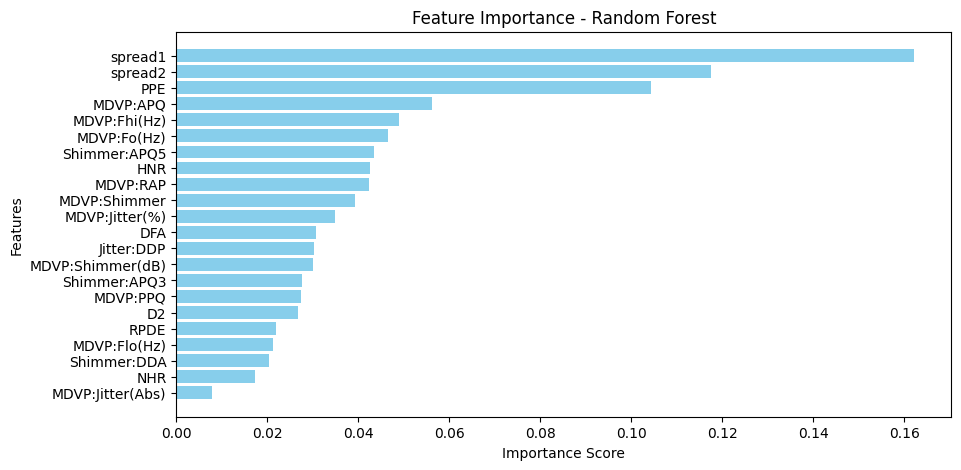

In [ ]:
import matplotlib.pyplot as plt
feature_importances = modelrand.feature_importances_

# Convert to DataFrame for better visualization
feature_importance_df = pd.DataFrame({'Feature': x.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print(feature_importance_df)
# Plot feature importance
plt.figure(figsize=(10, 5))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.title('Feature Importance - Random Forest')
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.show()

In [24]:
import pickle

with open("parkinson.pkl",'wb') as file:
    pickle.dump(modelrand,file)
print("Model saved as parkison_disease.pkl")

Model saved as parkison_disease.pkl
